In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
red = pd.read_csv('winequality-red.csv',sep=';')
white = pd.read_csv('winequality-white.csv',sep=';')

In [3]:
# store wine type as an attribute
red['type'] = 'red'   
white['type'] = 'white'
# merge red and white wine datasets
wines = pd.concat([red, white])
# re-shuffle records to randomize data points
wines = wines.sample(frac = 1, random_state = 3).reset_index(drop = True)

In [4]:
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            5.9             0.180         0.28             1.0      0.037   
1           10.2             0.670         0.39             1.9      0.054   
2            8.4             0.715         0.20             2.4      0.076   
3            6.8             0.370         0.51            11.8      0.044   
4            8.9             0.750         0.14             2.5      0.086   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                  88.0  0.99094  3.29       0.55   
1                  6.0                  17.0  0.99760  3.17       0.47   
2                 10.0                  38.0  0.99735  3.31       0.64   
3                 62.0                 163.0  0.99760  3.19       0.44   
4                  9.0                  30.0  0.99824  3.34       0.64   

   alcohol  quality   type  
0    10.65        7  white  
1    10.00        5    red  
2     9.40        5    red  
3     8.80        5  white  
4    10.50        5    red

In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

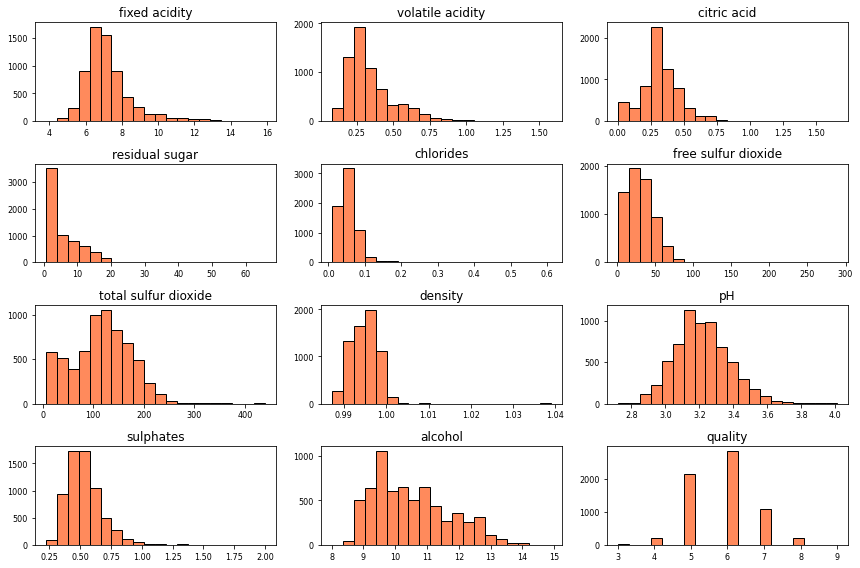

In [7]:
wines.hist(bins = 20, color = '#ff8a5c', edgecolor = 'black', 
           linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False)    
plt.tight_layout(rect = (0, 0, 2, 2))

Using histoframs to visualize all numeric data and understand the distribution, the plots above give us a first look at the distribution of all attribute data for red and white wines. And then, we'll drill down to looking at some of these continuous numeric attributes.

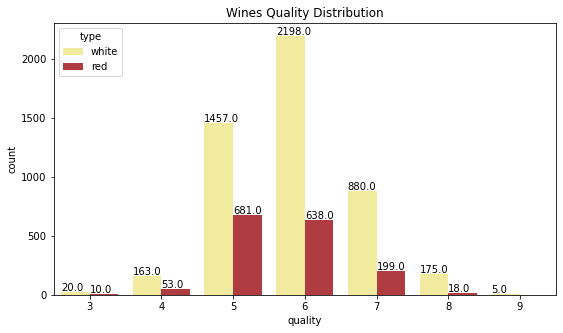

In [8]:
plt.figure(figsize = (9,5))
figquality = sns.countplot(x = 'quality', hue = 'type' , data = wines, 
                           palette = {"red": "#C1292E", "white": "#fff591"})
figquality.set_title("Wines Quality Distribution")
for p in figquality.patches:
    figquality.annotate(f'\n{p.get_height()}', 
                        (p.get_x(), p.get_height()+10), color ='black', size = 10)

The above plot shows the quality distribution of red and white wine, we can clearly see that the quliaty of wine is mainly concentrated in 5 and 6. Among them, the quality range of White wine is more extensive, ranging from 3 to 9, mainly concentrated in 6, and the total number of wine is 1.5 times that of quality 5; Red wine’s distribution of quality 5 and quality 6 is relatively similar, but significantly more than other quality rate.

Text(0.5, 1.0, 'Wines pH Distribution')

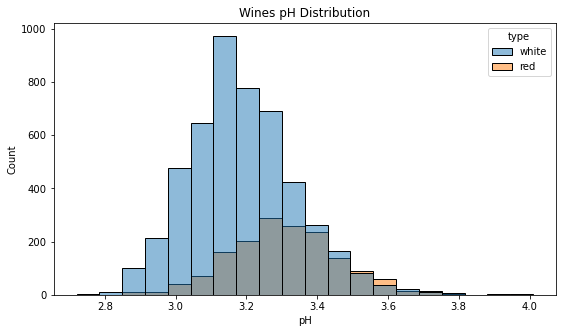

In [9]:
plt.figure(figsize = (9,5))
wineph = sns.histplot(wines, x = "pH", hue = 'type', bins = 20, )
wineph.set_title("Wines pH Distribution")

Through the pH distribution of red wine and white wine, we can find that the pH of the two wines is similar, and the white wine is generally more acidic. Most white wines have a pH in the 3.0-3.2 range, while most red wines have a pH in the 3.2-3.4 range. Also, in the range of 3.8-4.0 is almost red wine.

<AxesSubplot:>

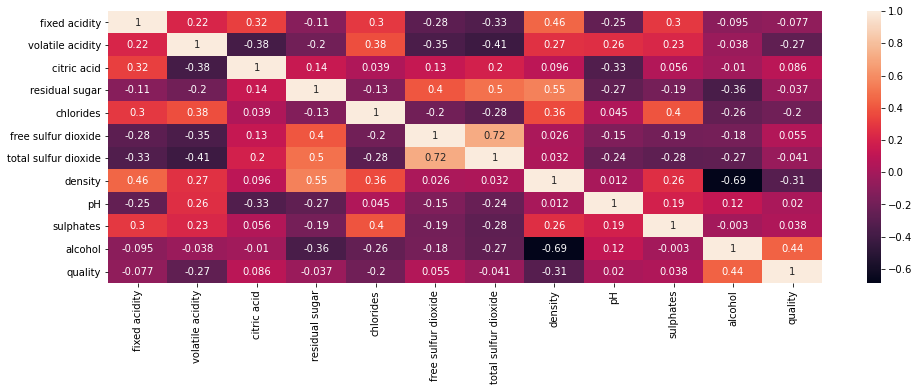

In [10]:
plt.figure(figsize = (16,5))
sns.heatmap(wines.corr(), annot = True)

We used heatmaps to examine potential relationships between different data attributes. And established a pivot table, in order to explore more interesting information.

In [11]:
table = pd.pivot_table(wines, index = ['quality']).round(3)
table.sort_values(by = 'alcohol', ascending = True)

alcohol  chlorides  citric acid  density  fixed acidity  \
quality                                                            
5          9.838      0.065        0.308    0.996          7.327   
4         10.180      0.060        0.272    0.995          7.289   
3         10.215      0.077        0.281    0.996          7.853   
6         10.588      0.054        0.324    0.995          7.177   
7         11.386      0.045        0.335    0.993          7.129   
8         11.679      0.041        0.333    0.993          6.835   
9         12.180      0.027        0.386    0.991          7.420   

         free sulfur dioxide     pH  residual sugar  sulphates  \
quality                                                          
5                     30.237  3.212           5.804      0.526   
4                     20.637  3.232           4.154      0.506   
3                     39.217  3.258           5.140      0.506   
6                     31.165  3.218           5.550      0.533   
7                     30.422  3.228           4.732      0.547   
8                     34.534  3.223           5.383      0.512   
9                     33.400  3.308           4.120      0.466   

         total sulfur dioxide  volatile acidity  
quality                                          
5                     120.839             0.390  
4                     103.433             0.458  
3                     122.033             0.517  
6                     115.411             0.314  
7                     108.499             0.289  
8                     117.518             0.291  
9                     116.000             0.298

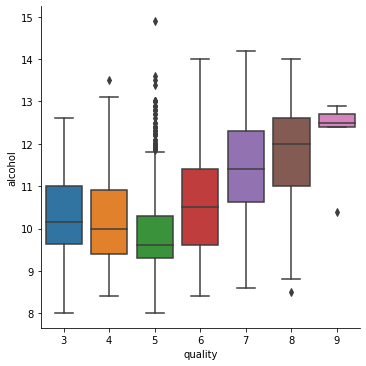

In [12]:
sns.catplot(x = "quality", y = "alcohol", kind = "box", data = wines)

Through the boxplot, we can notice the relationship between wine quality and alcohol content, the average alcohol content of quality 3-5 decreases, while the average alcohol content of quality 5-9 gradually increases. Quality 5 and up, the higher the quality, the higher the alcohol content. Among them, the alcohol content of wine with quality 5 has a wider distribution range, and the alcohol content of wine with quality 9 is more concentrated than other qualities.

<AxesSubplot:xlabel='sulphates', ylabel='residual sugar'>

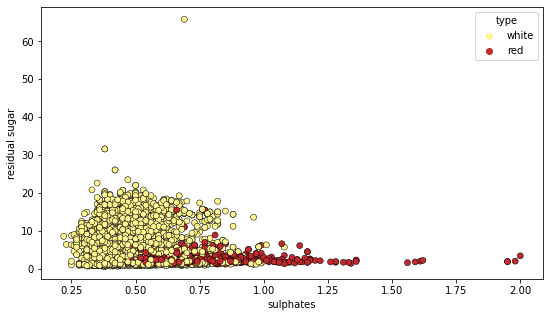

In [13]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = "sulphates", y = "residual sugar", hue = "type", 
                palette = {"red": "#C1292E", "white": "#fff591"},
                edgecolor = "k", linewidth = 0.5, data = wines)

Since we were interested in the relationship of wine attributes, a scatter plot of sulphates and residual sugar is made, and we observed the different characteristics of red wine and white wine. As can be seen from the plot above, although there is very weak correlation, we can still notice sulphates are slightly higher for red wines than white wines, while white wine has residual sugar is significantly for white wines as compare to red wine.